In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn import metrics


#class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]¶
np.random.seed(38)

In [306]:
def preprocessing(data,flag=None):
    # delete the last row
    data.drop(data.index[-1],inplace=True)
    data.drop(['ID'],axis =1,inplace =True)
    
    data['price/Beds'] = data['Price']/data['Beds']
    data['price/Rev'] = data['Price']/data['Review']
    data['price/picqual'] = data['Price']/data['Pic Quality']
    
    SS = StandardScaler()
    if 'Accept' in data.columns:
        data_ss = SS.fit_transform(data.loc[:, data.columns != 'Accept'])
    else:
        data_ss=SS.fit_transform(data)
    
    data_ss = pd.DataFrame(data_ss)
    
    
    # one-hot encoding weekday and region
    encoder = OneHotEncoder(sparse=False,categories='auto')
    data_region1hot = encoder.fit_transform(data['Region'].values.reshape(-1, 1))
    data_region = pd.DataFrame(data_region1hot)
    data_weekday1hot = encoder.fit_transform(data['Weekday'].values.reshape(-1, 1))
    data_weekday = pd.DataFrame(data_weekday1hot)
    if not flag: 
        data_final = pd.concat([data_ss, data_region, data_weekday,data['Accept']], axis=1)
    else:
         data_final = pd.concat([data_ss, data_region, data_weekday], axis=1)
    return data_final


# from datafame get train and validate data set
def train_test(data_final):
    split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=38)
    for train_index, test_index in split.split(data_final,data_final['Accept']):
        train = data_final.loc[train_index]
        test = data_final.loc[test_index]
    train_data = train.loc[:, train.columns != 'Accept']
    train_label = train.loc[:, train.columns == 'Accept']
    test_data = test.loc[:, test.columns != 'Accept']
    test_label = test.loc[:, test.columns == 'Accept']
    # from DataFrame to array
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    test_data = np.array(test_data)
    test_label = np.array(test_label)
    return train_data,test_data,train_label,test_label

In [330]:
train = pd.read_csv('case2_training.csv',encoding ='ISO-8859-1')
test = pd.read_csv('case2_testing.csv', encoding = 'ISO-8859-1')
data_final = preprocessing(train)
x_train,x_test,y_train,y_test = train_test(data_final)

# keep fist id column
ID = test['ID']

In [331]:
# preprocessing test data
test_final = preprocessing(test,flag=1)

In [332]:
# array form test_final for prediction
test_final = np.array(test_final)
print(test_final)

[[-1.57276862 -1.13039445 -0.9943421  ...  0.          0.
   0.        ]
 [ 1.21895282 -1.34789093  1.51497526 ...  0.          0.
   1.        ]
 [-1.22380344  0.86489934 -0.49247862 ...  0.          0.
   0.        ]
 ...
 [-1.22380344  1.05402671 -0.9943421  ...  0.          0.
   0.        ]
 [ 1.21895282  0.62849012  1.01311179 ...  0.          1.
   0.        ]
 [ 0.52102246  0.38262453 -1.49620557 ...  0.          0.
   0.        ]]


In [194]:
# # drop id
# train.drop('ID',axis =1,inplace= True)
# test.drop("ID", axis = 1, inplace = True)

In [195]:
# # drop last row
# train.drop(50000,inplace = True)

In [196]:
# corrmat_train = train.corr()
# # plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat_train, vmax=0.5, square=True)

In [197]:
# var = 'Beds'
# data = pd.concat([train['Price'], train[var]], axis=1)
# fig = sns.boxplot(x=var, y="Price", data=data)

In [198]:
# var = 'Apartment'
# data = pd.concat([train['Price'], train[var]], axis=1)
# fig = sns.boxplot(x=var, y="Price", data=data)

In [199]:
# # deal with region column
# data = pd.DataFrame(train['Region'].value_counts())
# plt.stem(data.index,data['Region'],use_line_collection=True)

# # df['Region'].hist(bins=10)

In [200]:
# # explore 'date' feautre

# df = train[train['Accept']==1.0]
# # df = df['Date'].value_counts()
# df['Date'].hist(bins=366)

In [201]:
# # Price distibutiuon plot 
# sns.distplot(train['Price'])
# print('Skewness is :',train['Price'].skew())
# print('Kurtosis is :',train['Price'].kurtosis()-3)

In [202]:
# # data with accpet=0
# df_0 = train[train['Accept']==0.0]
# df_0

In [203]:
# df_0['Region'].hist()

In [204]:
# df['Beds'].hist()

In [205]:
# df['Weekday'].value_counts()

In [206]:
# df['Apartment'].value_counts()

In [207]:
# df_0['Apartment'].value_counts()

In [208]:
# print(train.columns)
# # train


In [209]:
# # ignore [date,weekday ] deature
# train.drop(columns = ['Date', 'Weekday'],inplace =True)

In [210]:
# # one-hot encoding for 'Region' feature
# code1 = OneHotEncoder( categories='auto').fit_transform(train[['Region']]).toarray()
# code1

In [211]:
# train[['Region']]

In [212]:
# # another way to one-hot encoding
# encoder = OneHotEncoder(sparse=False,categories='auto')
# dum_transf = encoder.fit_transform(train[['Region']])
# tmp = pd.DataFrame(dum_transf, columns=encoder.get_feature_names())

In [213]:
# # drop original Region column
# train.drop('Region',axis=1,inplace=True)
# print(train)

In [214]:
# dummies =list(tmp.columns)
# dummies

In [215]:
# y_pre = train['Accept']
# train.drop('Accept',axis=1,inplace = True)
# train

In [216]:
# # reform the table
# train_dummy = tmp.join(train)
# train_dummy

In [217]:
# # standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_d = scaler.fit_transform(train)

In [218]:
# # array form  labels
# y_pre = np.array(y_pre)
# y_pre

In [219]:
# # final train data set 
# train_final = np.hstack( (np.array(tmp),train_d ) )
# train_final

In [222]:
# remove region and do the scaler and then hstack two array

In [230]:
train_final = np.array( data_final.loc[:,data_final.columns!='Accept'] )
y_pre = np.array(data_final['Accept'])

array([[-0.52241636, -1.4275564 ,  0.50152626, ...,  1.        ,
         0.        ,  0.        ],
       [-1.22108614, -0.9069798 ,  0.00360495, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17308147,  0.89137575,  0.50152626, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.573593  , -0.78393442, -0.49431636, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.573593  , -0.12138237, -0.49431636, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22108614,  0.39919423, -0.99223767, ...,  0.        ,
         0.        ,  0.        ]])

# Logistic Regression

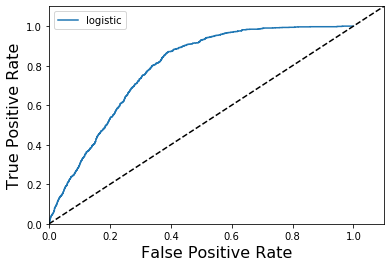

Accuracy 0.7082
Precision 0.4748235294117647
Recall 0.746301775147929
AUC 0.7847817641830168


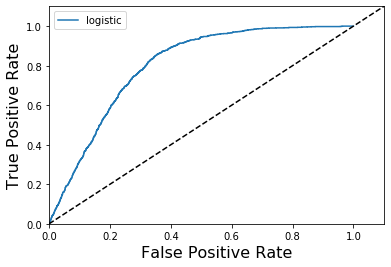

Accuracy 0.7222
Precision 0.49122807017543857
Recall 0.7662721893491125
AUC 0.7983471935663865


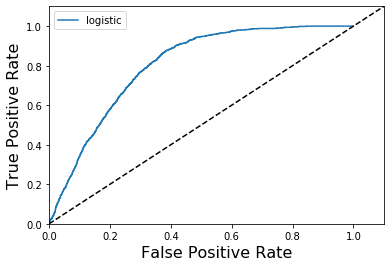

Accuracy 0.7204
Precision 0.489058039961941
Recall 0.7603550295857988
AUC 0.7996052793781793


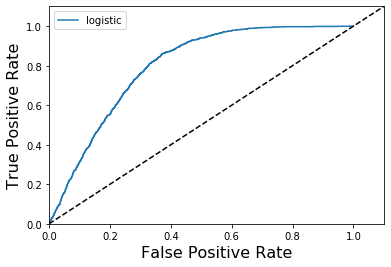

Accuracy 0.718
Precision 0.48616412213740456
Recall 0.753698224852071
AUC 0.7941195791809406


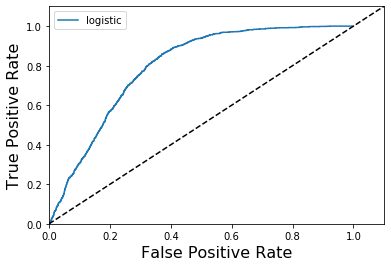

Accuracy 0.7208
Precision 0.4891411648568608
Recall 0.7329881656804734
AUC 0.7931496061714938


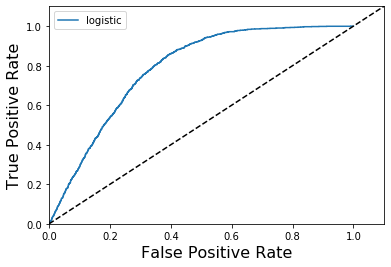

Accuracy 0.707
Precision 0.4737819025522042
Recall 0.7551775147928994
AUC 0.7833132201806292


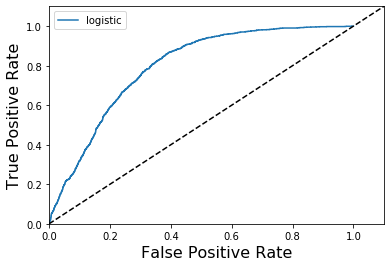

Accuracy 0.7136
Precision 0.4809342230695901
Recall 0.746301775147929
AUC 0.7924975507370496


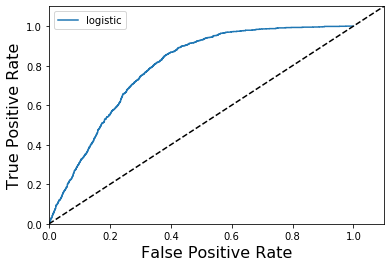

Accuracy 0.7126
Precision 0.4794586756887385
Recall 0.7337278106508875
AUC 0.7879578986297103


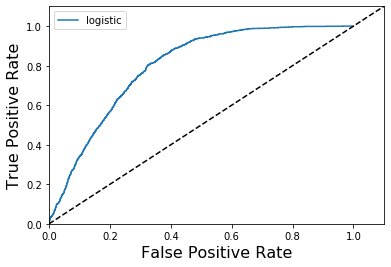

Accuracy 0.7172
Precision 0.4851674641148325
Recall 0.75
AUC 0.7963784565426139


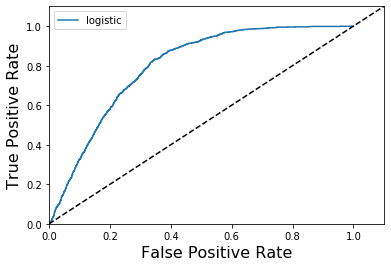

Accuracy 0.7158
Precision 0.48345323741007196
Recall 0.7455621301775148
AUC 0.7951670040485829


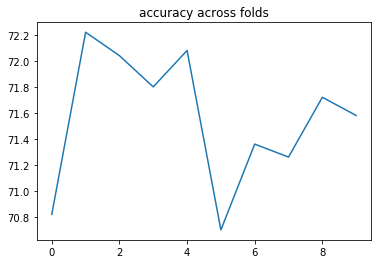

<Figure size 432x288 with 0 Axes>

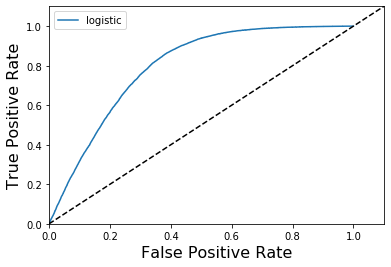

Accuracy 0.71546
Precision 0.48307062241059096
Recall 0.7505179047055341
AUC 0.7928450066075903


In [311]:
# logistic regression

train_final = np.array( data_final.loc[:,data_final.columns!='Accept'] )
y_pre = np.array(data_final['Accept'])

acc = []
kf = StratifiedShuffleSplit(n_splits=10,random_state=38 )# Define the split - into k folds
for train_index, validate_index in kf.split(train_final,y_pre):
    
    x_train,y_train = train_final[train_index],y_pre[train_index]
    x_val ,y_val = train_final[validate_index],y_pre[validate_index]
    clf = lg(solver ='lbfgs',class_weight='balanced')
    clf=clf.fit(x_train,y_train )
    pre_log = clf.predict(x_val)
#     print(pre)
#     print(y_pre[validate_index])
#     acc.append(sum(pre == y_pre[validate_index])/len(y_pre[validate_index]) *100)
    acc.append(sum(pre_log == y_val)/len(y_val) *100)

#     print("classifier's classes are ",clf.classes_)
    prob1_ =clf.predict_proba(x_val)[:,-1]
    
    # print(y_pre)

    fpr_, tpr_, thresholds_ = metrics.roc_curve(y_val, prob1_,pos_label=1.0)
    plt.figure()
    plot_roc_curve(fpr_,tpr_,label='logistic')

    
    print('Accuracy',metrics.accuracy_score(y_val, clf.predict(x_val)))
    print('Precision',precision_score(y_val, clf.predict(x_val)))

    print('Recall',recall_score(y_val, clf.predict(x_val)))
    print('AUC',metrics.auc(fpr_, tpr_))
    
plt.figure()
plt.plot(range(len(acc)),acc)
plt.title('accuracy across folds') 

plt.figure()
clf_log = lg(solver ='lbfgs',class_weight='balanced')
clf_log=clf_log.fit(train_final,y_pre )
prob1_ =clf_log.predict_proba(train_final)[:,-1]
    # print(prob1_)
    # print(y_pre)

fpr_, tpr_, thresholds_ = metrics.roc_curve(y_pre, prob1_,pos_label=1.0)
plt.figure()
plot_roc_curve(fpr_,tpr_,label='logistic')

print('Accuracy',metrics.accuracy_score(y_pre, clf.predict(train_final)))

print('Precision',precision_score(y_pre, clf.predict(train_final)))

print('Recall',recall_score(y_pre, clf.predict(train_final)))

print('AUC',metrics.auc(fpr_, tpr_))

In [ ]:
metrics.roc_curve?

# KNN

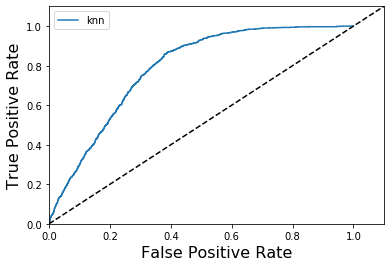

Accuracy 0.7096
Precision 0.4764373232799246
Recall 0.7477810650887574
AUC 0.7853389309534933


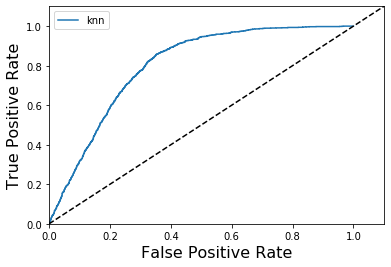

Accuracy 0.7216
Precision 0.4905123339658444
Recall 0.764792899408284
AUC 0.7987723677722411


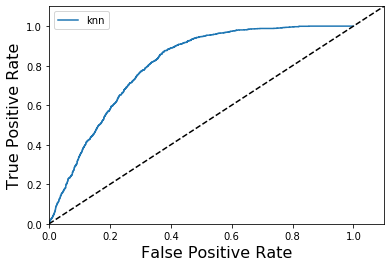

Accuracy 0.7196
Precision 0.48810656517602286
Recall 0.7588757396449705
AUC 0.8001346689115539


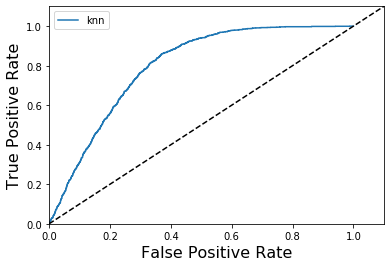

Accuracy 0.719
Precision 0.4873749404478323
Recall 0.7566568047337278
AUC 0.794574558159452


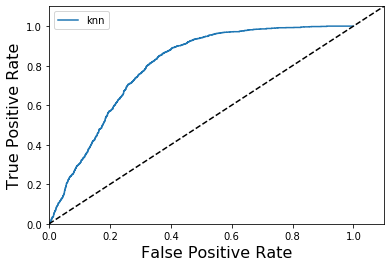

Accuracy 0.7214
Precision 0.4899361806578301
Recall 0.7381656804733728
AUC 0.79343143361362


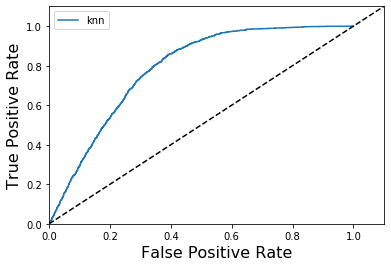

Accuracy 0.706
Precision 0.47263450834879406
Recall 0.753698224852071
AUC 0.783626677177411


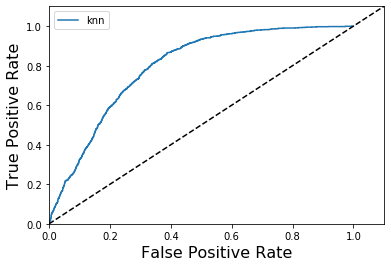

Accuracy 0.7146
Precision 0.4821343496903287
Recall 0.7485207100591716
AUC 0.7931842770294821


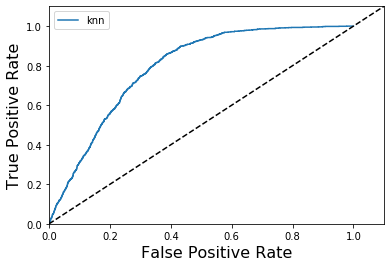

Accuracy 0.7136
Precision 0.48071359691417553
Recall 0.7374260355029586
AUC 0.7883293431433614


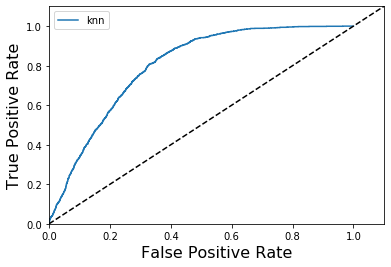

Accuracy 0.7168
Precision 0.484688995215311
Recall 0.7492603550295858
AUC 0.7971077610816982


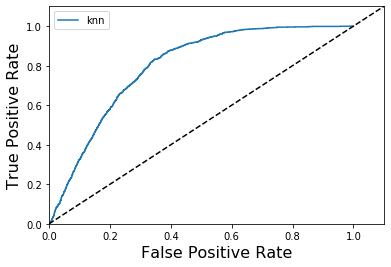

Accuracy 0.7158
Precision 0.48345323741007196
Recall 0.7455621301775148
AUC 0.7951670040485829


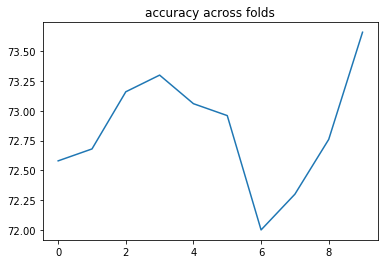

<Figure size 432x288 with 0 Axes>

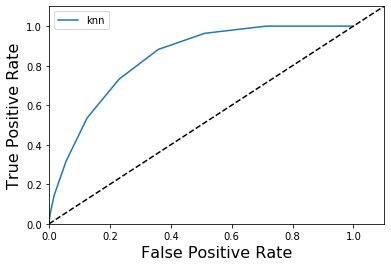

Accuracy 0.71546
Precision 0.48307062241059096
Recall 0.7505179047055341
AUC 0.8360744315459068


In [312]:
# KNN
acc_knn=[]
kf = StratifiedShuffleSplit(n_splits=10,random_state=38) # Define the split - into k folds
for train_index, validate_index in kf.split(train_final,y_pre):
#     print(train_index)
#     clf = lg(solver = 'newton-cg')
#     clf = clf.fit( train_final[train_index],y_pre[train_index]  )
#     pre = clf.predict(train_final[validate_index]) 
    x_train,y_train = train_final[train_index],y_pre[train_index]
    x_val ,y_val = train_final[validate_index],y_pre[validate_index]
    
    clf_knn = KNeighborsClassifier(n_neighbors=10)
    clf_knn=clf_knn.fit(x_train,y_train )
    pre_knn = clf_knn.predict(x_val)
#     print(pre)
#     print(y_pre[validate_index])
#     acc.append(sum(pre == y_pre[validate_index])/len(y_pre[validate_index]) *100)
    acc_knn.append(sum(pre_knn == y_val)/len(y_val) *100)

    prob1_ =clf.predict_proba(x_val)[:,-1]
    # print(prob1_)
    # print(y_pre)

    fpr_, tpr_, thresholds_ = metrics.roc_curve(y_val, prob1_,pos_label=1.0)
    plt.figure()
    plot_roc_curve(fpr_,tpr_,label='knn')
    
    print('Accuracy',metrics.accuracy_score(y_val, clf.predict(x_val)))

    print('Precision',precision_score(y_val, clf.predict(x_val)))

    print('Recall',recall_score(y_val, clf.predict(x_val)))
    
    print('AUC',metrics.auc(fpr_, tpr_))
    
    
plt.figure()
plt.plot(range(len(acc_knn)),acc_knn)
plt.title('accuracy across folds')

plt.figure()

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn=clf_knn.fit(train_final,y_pre )
prob1_ =clf_knn.predict_proba(train_final)[:,-1]
    # print(prob1_)
    # print(y_pre)

fpr_, tpr_, thresholds_ = metrics.roc_curve(y_pre, prob1_,pos_label=1.0)

plt.figure()
plot_roc_curve(fpr_,tpr_,label='knn')

print('Accuracy',metrics.accuracy_score(y_pre, clf.predict(train_final)))

print('Precision',precision_score(y_pre, clf.predict(train_final)))

print('Recall',recall_score(y_pre, clf.predict(train_final)))

print('AUC',metrics.auc(fpr_, tpr_))


# xgboost


In [241]:
# scale weights
weights =  len(x_train[y_train==0.0])/len(x_train[y_train==1.0])

In [260]:
'''
fine tune n_estimators
'''
from sklearn.model_selection import GridSearchCV
param1 = {'n_estimators': range(30, 300, 25)}
gs1 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.01,
                                                n_estimators=50,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', 
                                                nthread=4, seed=38,
                                                booster = 'gbtree'),
                        param_grid=param1,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gs1.fit(x_test, y_test.ravel())
print(gs1.best_params_, gs1.best_score_)
#{'n_estimators': 280} 0.7910861907022435

{'n_estimators': 280} 0.7910861907022435


In [256]:
'''
learning rate fine-tuning


'''
param2 = {'learning_rate': [0.01*x for x in range(1, 10, 1)]}
gs2 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.01,
                                                n_estimators=280,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', nthread=4, seed=38,booster = 'gbtree'),
                   
                        param_grid=param2,
                        scoring='roc_auc',
                        iid=False,
                        cv=5)
gs2.fit(x_test, y_test.ravel())
print(gs2.best_params_, gs2.best_score_)
#{'learning_rate': 0.02} 0.7932022793240113

{'learning_rate': 0.02} 0.7932022793240113


In [264]:
'''
min_child_weight:
定义了一个子集的所有观察值的最小权重和。
这个可以用来减少过拟合，但是过高的值也会导致欠拟合，因此可以通过CV来调整min_child_weight。

max_depth:
树的最大深度，值越大，树越复杂。
这个可以用来控制过拟合，典型值是3-10。
'''
param3 = {
    'max_depth': range(3, 11, 1), # normally 3-10 层
    'min_child_weight': range(1, 6, 2)
}
gs3 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.02,
                                                n_estimators=280,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', nthread=4, seed=38,booster='gbtree'),
                        param_grid=param3,
                        scoring='roc_auc',
                        iid=False,
                        cv=5)
gs3.fit(x_test, y_test.ravel())
print(gs3.best_params_, gs3.best_score_)
#{'max_depth': 4, 'min_child_weight': 5} 0.7944043103545573

{'max_depth': 4, 'min_child_weight': 5} 0.7944043103545573


In [265]:
'''fine tune subsample 
    and colsample_bytree 
    样本的采样率，如果设置成0.5，那么Xgboost会随机选择一般的样本作为训练集。
    构造每棵树时，列采样率（一般是特征采样率）

'''
param4 = {
   'subsample': [0.1*i for i in range(6, 10)],
    'colsample_bytree': [0.1*i for i in range(6, 10)]
}
gs4 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.02,
                                                n_estimators=280,
                                                max_depth=4,
                                                min_child_weight=5,
                                                gamma=0,
                                                subsample=0.7,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', nthread=4, seed=38,booster='gbtree'),
                        param_grid=param4,
                        scoring='roc_auc',
                        iid=False,
                        cv=5)
gs4.fit(x_test, y_test.ravel())
print(gs4.best_params_, gs4.best_score_)
#{'colsample_bytree': 0.8, 'subsample': 0.7000000000000001} 0.7947591435145955

{'colsample_bytree': 0.8, 'subsample': 0.7000000000000001} 0.7947591435145955


In [266]:
# fine tune gamma 一个结点被分割时，所需要的最小损失函数减小的大小
param5 = {
   'gamma': [0.1*i for i in range(1, 10)],
}
gs5 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.02,
                                                n_estimators=280,
                                                max_depth=4,
                                                min_child_weight=5,
                                                gamma=0,
                                                subsample=0.7000000000000001,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', nthread=4, seed=38,booster='gbtree'),
                        param_grid=param5,
                        n_jobs=4,
                        scoring='roc_auc',
                        iid=False,
                        cv=5)
gs5.fit(x_test, y_test.ravel())
print(gs5.best_params_, gs5.best_score_)
# {'gamma': 0.30000000000000004} 0.7948912372554556

{'gamma': 0.30000000000000004} 0.7948912372554556


In [267]:
'''
fine tune l1 and l2 regularization coefficients

''' 
param6 = {
   'reg_alpha': [0.1*i for i in range(1, 30,5)],
    'reg_lamda':[0.1*i for i in range(1,30,5)]
}
gs6 = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=weights,
                                                learning_rate=0.02,
                                                n_estimators=280,
                                                max_depth=4,
                                                min_child_weight=5,
                                                gamma=0.30000000000000004,
                                                subsample=0.7000000000000001,
                                                colsample_bytree=0.8,
                                                reg_alpha=0, reg_lambda=1,
                                                objective='binary:logistic', nthread=4, seed=38,booster='gbtree'),
                        param_grid=param6,
                        n_jobs=4,
                        scoring='roc_auc',
                        iid=False,
                        cv=5)

gs6.fit(x_test, y_test.ravel())
print(gs6.best_params_, gs6.best_score_)
#{'reg_alpha': 0.1, 'reg_lamda': 0.1} 0.7947669733604095

{'reg_alpha': 0.1, 'reg_lamda': 0.1} 0.7947669733604095


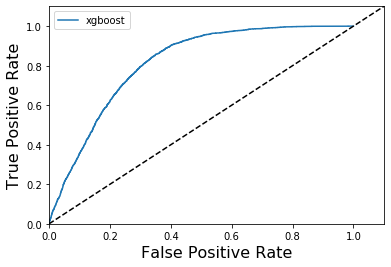

Accuracy: 0.6864
Precision: 0.4565522777443307
Recall: 0.8416574176840548
AUC 0.8120290871060234


In [314]:
'''
测试 on x_test

'''
xgbt = XGBClassifier(
                      learning_rate=0.02,
                      n_estimators=280,           # 树的个数-100棵树建立xgboost
                      max_depth=4,               # 树的深度
                      min_child_weight = 5,      # 叶子节点最小权重
                      gamma=0.30000000000000004,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.7000000000000001,               # 所有样本建立决策树
                      colsample_btree=0.8,         # 所有特征建立决策树
                      scale_pos_weight=weights,        # 解决样本个数不平衡的问题
                      random_state=38,           # 随机数
                      slient = 0,
                      reg_alpha=0.1, reg_lambda=0.1,
                      objective='binary:logistic', nthread=4, seed=38 )
xgbt.fit(train_final,
          y_pre)


y_prob = xgbt.predict_proba(x_test)[:,-1]
fpr_, tpr_, thresholds_ = metrics.roc_curve(y_test, y_prob)
plt.figure()
plot_roc_curve(fpr_,tpr_,label='xgboost')
print('Accuracy:',accuracy_score(y_test,model.predict(x_test)))
print('Precision:',precision_score(y_test,model.predict(x_test)))
print('Recall:',recall_score(y_test,model.predict(x_test)))
print('AUC',metrics.auc(fpr_, tpr_))


# Final Predictions On Test Data Set

In [335]:
ID.drop(20000,inplace=True)

##  Logistic

In [320]:
clf_log.predict_proba(test_final)[:,1]

array([0.25812013, 0.4643306 , 0.46451219, ..., 0.32672095, 0.71735455,
       0.5241546 ])

In [322]:
clf.classes_

array([0., 1.])

In [349]:
res =pd.DataFrame(clf_log.predict_proba(test_final)[:,1],index=ID, columns=['Probability of 1.0 class'])
res

,Probability of 1.0 class
ID,
1,0.258120
2,0.464331
3,0.464512
4,0.623743
5,0.275184
...,...
19996,0.748500
19997,0.391465
19998,0.326721


In [351]:
res.to_csv('logistic_prediction.csv')

## KNN 

In [323]:
clf_knn.classes_

array([0., 1.])

In [319]:
clf_knn.predict_proba(test_final)[:,1]


array([0. , 0.2, 0.2, ..., 0.3, 0.1, 0.3])

In [352]:
pd.DataFrame(clf_knn.predict_proba(test_final)[:,1],index=ID, columns=['Probability of 1.0 class']).to_csv('knn_prediction.csv')

## XGBT

In [324]:
xgbt.classes_

array([0., 1.])

In [354]:
prediction = xgbt.predict_proba(test_final)[:,1]
prediction

array([0.27302516, 0.53581905, 0.60993457, ..., 0.3402079 , 0.679739  ,
       0.55164105], dtype=float32)

In [355]:
pd.DataFrame(prediction,index=ID, columns=['Probability of 1.0 class']).to_csv('xgbt_prediction.csv')

#Random Forests

Accuracy: 0.6864
Precision: 0.4565522777443307
Recall: 0.8416574176840548


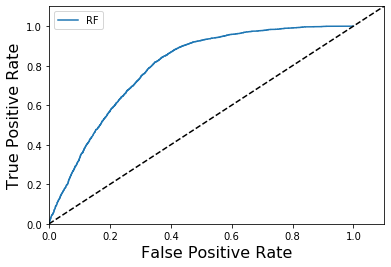

AUC 0.7899723739721233


In [313]:
# from sklearn.ensemble import RandomForestClassifier 

# clf = RandomForestClassifier(n_estimators=80,
#                                   min_samples_split=100,
#                                   min_samples_leaf=20,
#                                   max_depth=5,
#                                   max_features=10,
#                                   random_state=38,
#                                   class_weight={0: 1, 1: weights},
#                                   )
# rf = clf.fit(x_train,y_train)

# print('Accuracy:',accuracy_score(y_test,model.predict(x_test)))
# print('Precision:',precision_score(y_test,model.predict(x_test)))
# print('Recall:',recall_score(y_test,model.predict(x_test)))

# y_prob = rf.predict_proba(x_test)[:,-1]
# fpr_, tpr_, thresholds_ = metrics.roc_curve(y_test, y_prob)
# plt.figure()
# plot_roc_curve(fpr_,tpr_,label='RF')
# print('AUC',metrics.auc(fpr_, tpr_))